tensorflow学习,基本用法

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
#生成测试数据,共100个点
x = np.float32(np.random.rand(2, 1000))
y = np.dot([0.1, 0.2], x) + 0.3

print(y.size)

1000


In [18]:
#y = wx + b线性模型，x为2*100的矩阵,w为1*2的矩阵
b = tf.Variable(tf.zeros([1]))
w = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
yy = tf.matmul(w, x) + b

print(y)

[ 0.53828307  0.59175051  0.50662376  0.41891621  0.50363301  0.46302957
  0.34953536  0.36228407  0.46079589  0.38475957  0.41062428  0.48037645
  0.48950862  0.33219596  0.47233707  0.56718276  0.47801846  0.4431937
  0.55034517  0.44129574  0.40861221  0.52023039  0.51434492  0.45411459
  0.47477597  0.45303981  0.50886946  0.46194566  0.45524379  0.39929049
  0.52708121  0.46314688  0.52499069  0.43587931  0.40818889  0.37108358
  0.37431767  0.43091382  0.3947835   0.49995211  0.43121798  0.39789661
  0.54345242  0.35236034  0.39643786  0.51168994  0.52110766  0.47280154
  0.37220801  0.36394866  0.46559424  0.53018109  0.39733185  0.40250469
  0.36404659  0.48901736  0.3942665   0.52199968  0.59134047  0.39655493
  0.4377772   0.44918635  0.49956572  0.47450359  0.34128423  0.39771914
  0.44046758  0.33533443  0.36150106  0.37674787  0.53249837  0.55870122
  0.38089766  0.37176985  0.37730471  0.4885557   0.3763576   0.47502194
  0.37214613  0.36704832  0.3658117   0.55047088  0.

In [19]:
#最小化方差损失函数
#定义计算方式
loss = tf.reduce_mean(tf.square(yy - y))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [20]:
#初始化变量然后启动图开始计算
init = tf.initialize_all_variables()
#启动图(graph)
sess = tf.Session()
sess.run(init)

for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print("step:{},w:{},b:{}".format(step, sess.run(w), sess.run(b)))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step:0,w:[[ 0.51980937  0.07361154]],b:[ 0.3187677]
step:20,w:[[ 0.17835647  0.1835154 ]],b:[ 0.26793915]
step:40,w:[[ 0.11892971  0.20235954]],b:[ 0.28884968]
step:60,w:[[ 0.10511746  0.20217165]],b:[ 0.29616219]
step:80,w:[[ 0.1015151   0.20097442]],b:[ 0.29868579]
step:100,w:[[ 0.10047702  0.2003722 ]],b:[ 0.2995511]
step:120,w:[[ 0.10015579  0.20013371]],b:[ 0.29984689]
step:140,w:[[ 0.10005193  0.20004673]],b:[ 0.2999478]
step:160,w:[[ 0.1000175   0.20001613]],b:[ 0.29998222]
step:180,w:[[ 0.10000594  0.20000555]],b:[ 0.29999393]
step:200,w:[[ 0.100002    0.20000188]],b:[ 0.29999796]


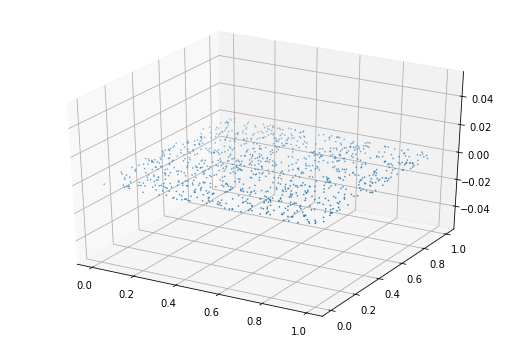

In [21]:
#使用plt作图显示拟合结果
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection = '3d')
plt.scatter(x[0,:], x[1,:], y)
plt.show()